In [2]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree


In [5]:
df = pd.read_csv('document.csv')
X = df[["asymmetry","pigment network","dots/globules","streaks","regression areas","blue whitish veil","white","blue grey","black"]].to_numpy()
y = df["clinical diagnosis"].to_numpy()
df.head
X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size=0.5,random_state=13)
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.4,random_state=23)


In [8]:
def results(name, clf, X_train, X_val, X_test, y_train, y_val, y_test):
    y_train_pred = clf.predict(X_train)
    y_val_pred = clf.predict(X_val)
    y_test_pred = clf.predict(X_test)
    train_acc = accuracy_score(y_train, y_train_pred)
    val_acc = accuracy_score(y_val, y_val_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    test_mat = confusion_matrix(y_test, y_test_pred)
    tn, fp, fn, tp = test_mat.ravel()
    test_rec = tp / (tp+fn)
    val_mat = confusion_matrix(y_val, y_val_pred)
    tn, fp, fn, tp = val_mat.ravel()
    val_rec = tp / (tp+fn)
    print(name)
    print("="*40)
    print("Training Score")
    print("Accuracy: " + str(train_acc))
    print("="*40)
    print("Validation Score")
    print("Accuracy: " + str(val_acc))
    print("Recall: " + str(val_rec))
    print("="*40)
    print("Testing Score")
    print("Accuracy: " + str(test_acc))
    print("Recall: " + str(test_rec))
    print("="*40)
    print("\n")



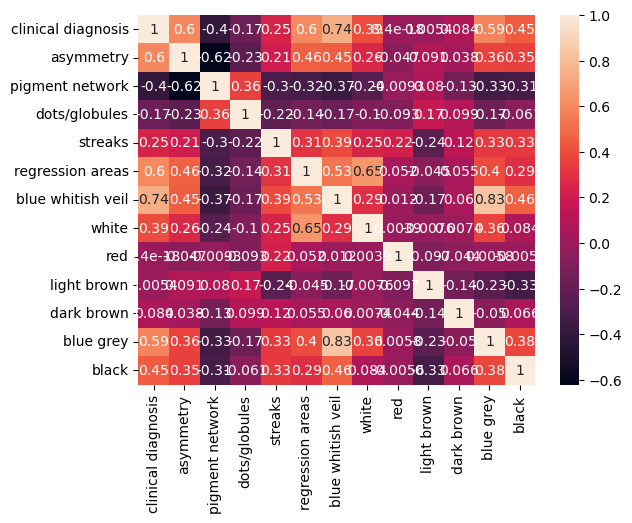

In [9]:
#Correlation Matrix
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [11]:
#Logistic Regression
clf_lr = LogisticRegression().fit(X_train, y_train) #fit the training data to the model
results("Logistic Regression",clf_lr, X_train, X_val, X_test, y_train, y_val, y_test)


Logistic Regression
Training Score
Accuracy: 0.94
Validation Score
Accuracy: 0.9333333333333333
Recall: 0.75
Testing Score
Accuracy: 0.9
Recall: 0.7777777777777778




In [19]:
clf_tr = DecisionTreeClassifier()
clf_tr.fit(X_train,y_train)
results("Decission tree",clf_tr, X_train, X_val, X_test, y_train, y_val, y_test)

Decission tree
Training Score
Accuracy: 0.99
Validation Score
Accuracy: 0.9166666666666666
Recall: 0.75
Testing Score
Accuracy: 0.8
Recall: 0.3333333333333333




[Text(0.53125, 0.9375, 'x[5] <= 1.5\ngini = 0.308\nsamples = 100\nvalue = [81, 19]\nclass = Normal'),
 Text(0.3125, 0.8125, 'x[0] <= 1.5\ngini = 0.133\nsamples = 84\nvalue = [78, 6]\nclass = Normal'),
 Text(0.25, 0.6875, 'gini = 0.0\nsamples = 71\nvalue = [71, 0]\nclass = Normal'),
 Text(0.375, 0.6875, 'x[4] <= 1.5\ngini = 0.497\nsamples = 13\nvalue = [7, 6]\nclass = Normal'),
 Text(0.3125, 0.5625, 'x[6] <= 0.5\ngini = 0.463\nsamples = 11\nvalue = [7, 4]\nclass = Normal'),
 Text(0.25, 0.4375, 'x[8] <= 0.5\ngini = 0.42\nsamples = 10\nvalue = [7, 3]\nclass = Normal'),
 Text(0.125, 0.3125, 'x[2] <= 0.5\ngini = 0.245\nsamples = 7\nvalue = [6, 1]\nclass = Normal'),
 Text(0.0625, 0.1875, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = Normal'),
 Text(0.1875, 0.1875, 'gini = 0.32\nsamples = 5\nvalue = [4, 1]\nclass = Normal'),
 Text(0.375, 0.3125, 'x[2] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]\nclass = Melanoma'),
 Text(0.3125, 0.1875, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclas

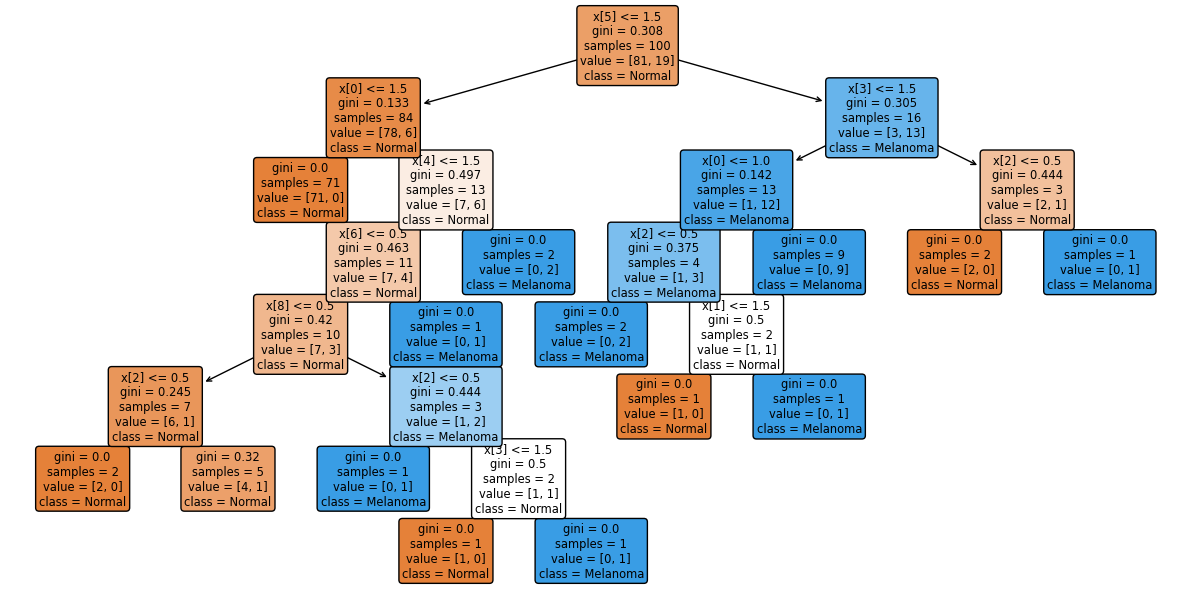

In [20]:
plt.figure(figsize = (15, 7.5))
plot_tree(clf_tr, filled = True, rounded = True, class_names=["Normal", "Melanoma"])
